In [1]:
import numpy as np
import scipy.stats as sci
import matplotlib.pyplot as plt

In [2]:
def d_constants(sigma, T, r, S_o, K, q = 0, t = 0):
    return np.log(S_o*np.exp((r-q)*(T-t))/K)/(sigma*np.sqrt(T-t)) + 0.5*sigma*np.sqrt(T-t), np.log(S_o*np.exp((r-q)*(T-t))/K)/(sigma*np.sqrt(T-t)) - 0.5*sigma*np.sqrt(T-t)

def cash_price(sigma, T, r, S_o, K, q = 0, option = "call", t = 0):
    d1, d2 = d_constants(sigma, T, r, S_o, K, q, t)
    if option == "call":
        return np.exp(-q*(T-t))*S_o*sci.norm.cdf(d1, 0, 1) - K*np.exp(-r*(T-t))*sci.norm.cdf(d2, 0, 1)
    else:
        return K*np.exp(-r*(T-t))*sci.norm.cdf(-d2, 0, 1) - np.exp(-q*(T-t))*S_o*sci.norm.cdf(-d1, 0, 1)
    
def cash_price_Bachelier(S, K, sigma, T, option = "call"):
    if option == "call":
        return (S-K)*sci.norm.cdf((S-K)/(sigma*np.sqrt(T))) + sigma*np.sqrt(T)*sci.norm.pdf((S-K)/(sigma*np.sqrt(T)))
    else:
        (K-S)*sci.norm.cdf((S-K)/(sigma*np.sqrt(T))) + sigma*np.sqrt(T)*sci.norm.pdf((K-S)/(sigma*np.sqrt(T)))
        

In [4]:
cash_price(0.2604, 0.153, 0.066, 98.64, 92.77, 0.053)

7.575728506662514

## Computations Put and Call Variations in price

### Put and Call Cash prices variation with K

In [4]:
S_o = 100
r = 0.02
T = 0.5
sigma = 0.25
Ks = np.arange(80, 120, 1)
calls = np.array([cash_price(sigma, T, r, S_o, K, "call") for K in Ks])
puts = np.array([cash_price(sigma, T, r, S_o, K, "put") for K in Ks])

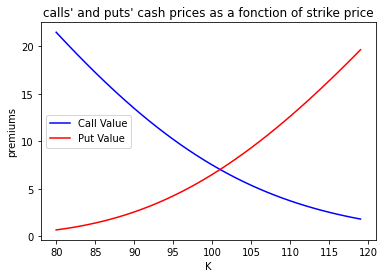

In [5]:
plt.plot(Ks, calls, color = 'blue', label = "Call Value")
plt.plot(Ks, puts, color = 'red', label = "Put Value")
plt.title("calls' and puts' cash prices as a fonction of strike price")
plt.xlabel("K")
plt.ylabel("premiums")
plt.legend()

### Put and Call Cash prices variation with $S_o$

In [13]:
K = 100
r = 0.02
T = 0.5
sigma = 0.25
S = np.arange(80, 120, 1)
calls = np.array([cash_price(sigma, T, r, S_o, K, "call") for S_o in S])
puts = np.array([cash_price(sigma, T, r, S_o, K, "put") for S_o in S])

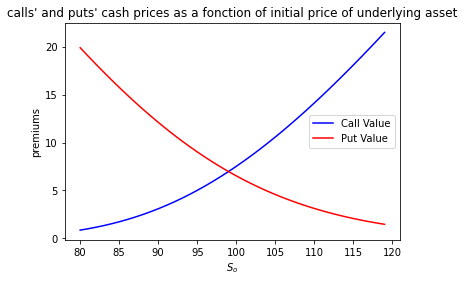

In [14]:
plt.plot(S, calls, color = 'blue', label = "Call Value")
plt.plot(S, puts, color = 'red', label = "Put Value")
plt.title("calls' and puts' cash prices as a fonction of initial price of underlying asset")
plt.xlabel("$S_o$")
plt.ylabel("premiums")
plt.legend()

### Put and Call Cash prices variation with volatility

In [15]:
K = 100
r = 0.02
T = 0.5
sigmas = np.linspace(0.02, 0.2, 20)
S = 100
calls = np.array([cash_price(sigma, T, r, S, K, "call") for sigma in sigmas])
puts = np.array([cash_price(sigma, T, r, S, K, "put") for sigma in sigmas])

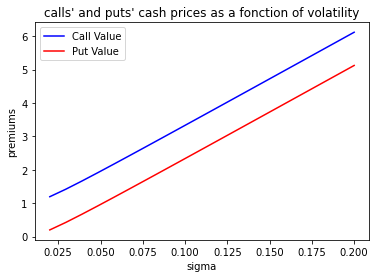

In [17]:
plt.plot(sigmas, calls, color = 'blue', label = "Call Value")
plt.plot(sigmas, puts, color = 'red', label = "Put Value")
plt.title("calls' and puts' cash prices as a fonction of volatility")
plt.xlabel("sigma")
plt.ylabel("premiums")
plt.legend()

### Put ans Call Cash prices variation with maturity

In [18]:
K = 100
r = 0.02
T = np.linspace(0.1, 2, 20)
sigma = 0.2
S = 100
calls = np.array([cash_price(sigma, time, r, S, K, "call") for time in T])
puts = np.array([cash_price(sigma, time, r, S, K, "put") for time in T])

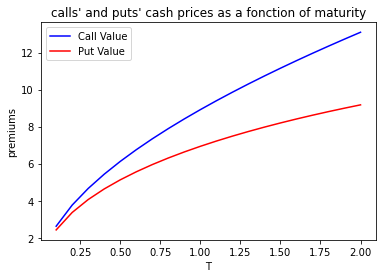

In [19]:
plt.plot(T, calls, color = 'blue', label = "Call Value")
plt.plot(T, puts, color = 'red', label = "Put Value")
plt.title("calls' and puts' cash prices as a fonction of maturity")
plt.xlabel("T")
plt.ylabel("premiums")
plt.legend()

## Computations of some greeks

In [6]:
def delta(sigma, T, r, S, K, q, option = "call"):
    d = d_constants(sigma, T, r, S, K, q)
    if option == "call":
        return sci.norm.cdf(d[0], 0, 1)*np.exp(-q*T)
    else:
        return sci.norm.cdf(d[1], 0, 1)*np.exp(-q*T) - 1
    
def delta_strike(sigma, T, r, S, K, q, option = "call"):
    d = d_constants(sigma, T, r, S, K, q)
    if option == "call":
        return (-1)*np.exp(-r*T)*sci.norm.cdf(d[1], 0, 1)
    else:
        return np.exp(-r*T)*(np.exp(q*T) - sci.norm.cdf(d[1], 0, 1))
    
def gamma(sigma, T, r, S, K, q):
    d = d_constants(sigma, T, r, S, K, q)
    return sci.norm.pdf(d[0], 0, 1)/(S*sigma*np.sqrt(T))*np.exp(-q*T)

def vega(sigma, T, r, S, K, q):
    d = d_constants(sigma, T, r, S, K, q)
    return S*np.sqrt(T)*sci.norm.pdf(d[0], 0, 1)*np.exp(-q*T)

def theta(sigma, T, r, S, K, q, option = "call"):
    d = d_constants(sigma, T, r, S, K, q)
    if option == "call":
        return S*sigma/(2*np.sqrt(T))*sci.norm.pdf(d[0], 0, 1)*np.exp(-q*T) + r*K*np.exp(-r*T)*sci.norm.cdf(d[1], 0, 1) - S*q*sci.norm.cdf(d[0], 0, 1)*np.exp(-q*T)
    else:
        return S*sigma/(2*np.sqrt(T))*sci.norm.pdf(d[0], 0, 1)*np.exp(-q*T) + r*K*np.exp(-q*T)*sci.norm.cdf(d[1], 0, 1) - S*q*np.exp(-q*T)*sci.norm.cdf(d[0], 0, 1) - K(r-q)*np.exp((q-r)T)
    
def rho(sigma, T, r, S, K, option = "call"):
    d = d_constants(sigma, T, r, S, K, q)
    if option == "call":
        return T*K*np.exp(-r*T)*sci.norm.cdf(d[1], 0, 1)
    else:
        return -T*K*np.exp(-r*T)*(np.exp(q*T) - sci.norm.cdf(d[1], 0, 1))
    

In [8]:
S = 100
r = 0.02
T = 0.5
sigma = 0.25
Ks = [95, 100, 105]
d = [d_constants(sigma, T, r, S, K) for K in Ks]
res_delta = [delta(sigma, T, r, S, Ks[i], d[i]) for i in range(len(Ks))]
res_delta_strike = [delta_strike(sigma, T, r, S, Ks[i], d[i]) for i in range(len(Ks))]
res_gamma = [gamma(sigma, T, r, S, Ks[i], d[i]) for i in range(len(Ks))]
res_vega = [vega(sigma, T, r, S, Ks[i], d[i]) for i in range(len(Ks))]
res_theta = [theta(sigma, T, r, S, Ks[i], d[i]) for i in range(len(Ks))]
res_rho = [rho(sigma, T, r, S, Ks[i], d[i]) for i in range(len(Ks))]

In [10]:
for i in range(len(Ks)):
    print(res_delta[i], res_delta_strike[i], res_gamma[i], res_vega[i], res_theta[i], res_rho[i], "\n")

0.6682607326058878 -0.5959380339523345 0.02052927111529688 25.661588894121103 7.5476794880397104 28.307056612735888 

0.5576275455577762 -0.48245908181864766 0.022331723838414294 27.914654798017867 7.943581863141761 24.12295409093238 

0.4478710581892622 -0.3753379545999979 0.02237464759053704 27.968309488171304 7.7802870767028205 19.70524261649989 



In [11]:
def newton_vol(T, S, r, K, q, Call_market, t = 0):
    sigma_0 = np.sqrt(2/(T-t)*np.abs(np.log(S*np.exp((r-q)*(T-t))/K)))
    next_sigma = sigma_0
    old_sigma = 0
    while np.abs(next_sigma - old_sigma) > 10**(-6):
        old_sigma = next_sigma
        next_sigma = next_sigma - 1/vega(next_sigma, T, r, S, K, q)*(cash_price(next_sigma, T, r, S, K, q, "call", t) - Call_market)
    return next_sigma    

### BinDic et DIC (cas regular, ie, D<=K)

In [ ]:
def DIC(S, D, r, q, T, sigma, K):
    gamma = 1 - 2*(r-q)/(sigma**2)
    return (S/D)**(gamma - 1)*cash_price(sigma, T, r, D, K*S/D, q)

def bin_cash(sigma, T, r, S, K, q, option = "call"):
    d = d_constants(sigma, T, r, S, K, q)
    if option == "call":
        return S*np.exp(-q*T)*sci.norm.cdf(d[0])
    else:
        return S*np.exp(-q*T)*sci.norm.cdf(-d[0])

def BinDIC(S, D, r, q, T, sigma, K):
    gamma = 1 - 2*(r-q)/(sigma**2)
    return (S/D)**(gamma - 1)*bin_cash(sigma, T, r, D, K*S/D, q)
